In [1]:
from resnet20 import ResNetCIFAR
from lenet import LeNet5, LeNet300
from alexnet import AlexNet
from train_util import train, test, train_gsm_unstructured, train_gsm_structured
from summary import summary
import torch
import numpy as np
from final_pruning import final_unstruct_pruning, final_struct_pruning
import torch.nn as nn
import matplotlib.pyplot as plt

from torchprofile import profile_macs
from evaluate_util import compute_conv_flops

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
EPOCHS = 50

### Based model LeNet-5 training with SGD

In [3]:
net = LeNet5()
net = net.to(device)

# Comment if you have pretrained weights
# train(net, epochs=EPOCHS, batch_size=128, lr=0.1, reg=1e-4, net_name = 'lenet_5_base.pt')

In [4]:
net.load_state_dict(torch.load("saved_models/lenet_5_base.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0218, Test accuracy=0.9943
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Convolutional_Param	500		500			0.000000
1		Convolutional_Filter	20		20			0.000000
2		Convolutional_Param	25000		25000			0.000000
2		Convolutional_Filter	50		50			0.000000
3		Linear		400000		400000			0.000000
3		tLinear_Filter	800		800			0.000000
4		Linear		5000		5000			0.000000
4		tLinear_Filter	500		500			0.000000
Total nonzero parameters: 430500
Total parameters: 430500
Total sparsity: 0.000000


2293000.0

### LeNet-5 Model Trained with Unstructured GSM SGD

In [21]:
NON_ZERO_RATIO = 0.15

In [29]:
net = LeNet5()
net = net.to(device)
net.load_state_dict(torch.load("saved_models/lenet_5_base.pt"))


# Comment if you have loaded pretrained weights
# train_gsm_unstructured(net, epochs=EPOCHS, batch_size=256, lr=0.03, nonzero_ratio = NON_ZERO_RATIO, 
#                        reg=1e-4, net_name = 'lenet_5_unstruct_gsm_before_pruning.pt')

<All keys matched successfully>

In [23]:
# net.load_state_dict(torch.load("saved_models/lenet_5_unstruct_gsm_before_pruning.pt"))
# final_unstruct_pruning(net, nonzero_ratio = NON_ZERO_RATIO, 
#                      net_name = "lenet_5_unstruct_gsm_after_pruning.pt")

In [30]:
net.load_state_dict(torch.load("saved_models/lenet_5_unstruct_gsm_after_pruning.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0271, Test accuracy=0.9924
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Convolutional_Param	500		159			0.682000
1		Convolutional_Filter	20		8			0.600000
2		Convolutional_Param	25000		867			0.965320
2		Convolutional_Filter	50		29			0.420000
3		Linear		400000		60785			0.848037
3		tLinear_Filter	800		459			0.426250
4		Linear		5000		2764			0.447200
4		tLinear_Filter	500		383			0.234000
Total nonzero parameters: 64575
Total parameters: 430500
Total sparsity: 0.850000


660978.0

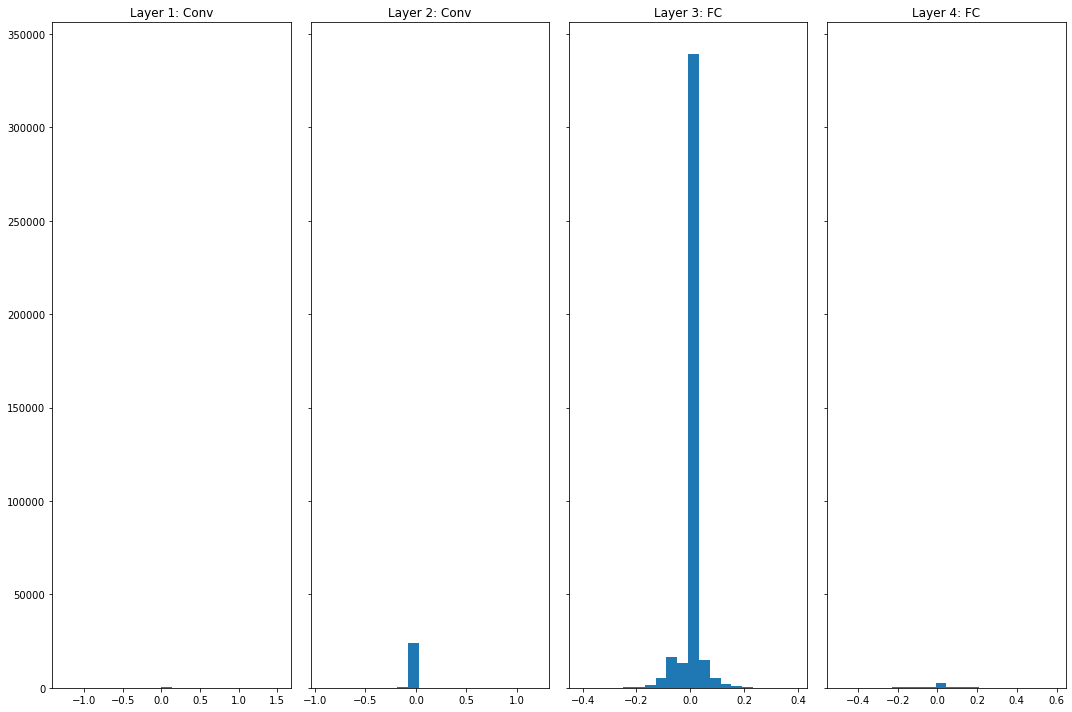

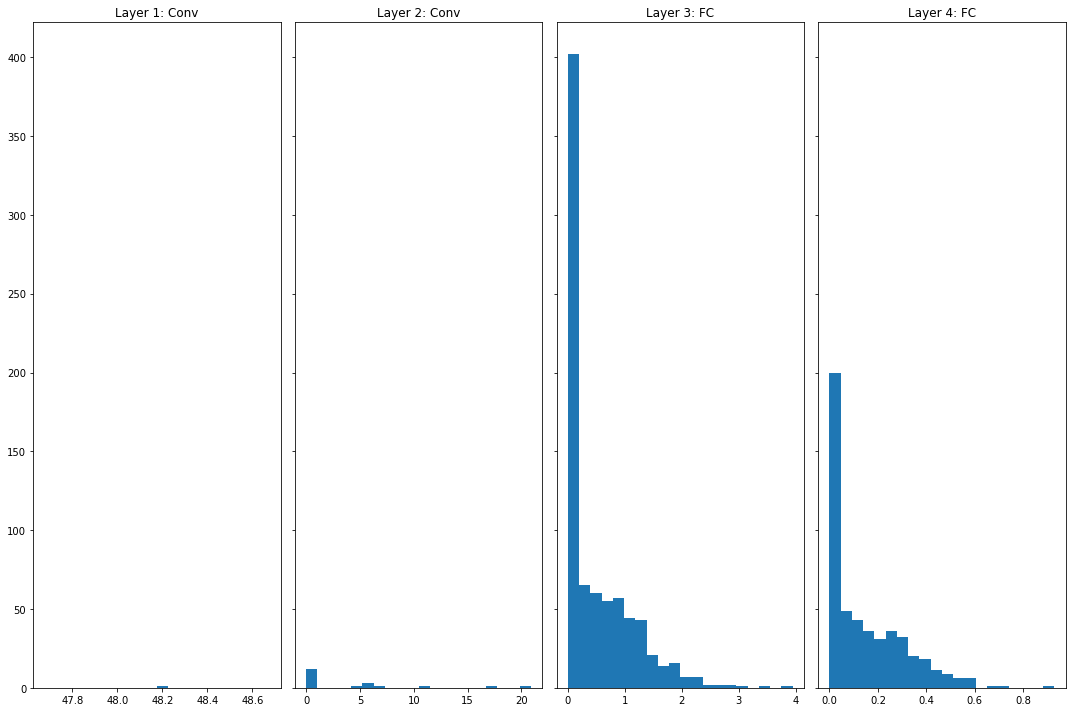

In [35]:
fig, axs = plt.subplots(1, 4, figsize = (15, 10),sharey=True, tight_layout=True)
axs = axs.flatten()
i = 0
for name, module in net.named_modules():
    if 'id_mapping' in name:
        continue    
    if isinstance(module, nn.Conv2d):
        title = "Conv"
        weight = module.weight.data.cpu().numpy()
    elif isinstance(module, nn.Linear):
        title = "FC"
        weight = module.weight.data.cpu().numpy()
    else:
        continue
    weight = weight.flatten()
    _ = axs[i].hist(weight, bins=20)
    axs[i].set_title("Layer "+ str(i+1) + ': ' + title)
    i+=1
plt.show()

fig, axs = plt.subplots(1, 4, figsize = (15, 10),sharey=True, tight_layout=True)
axs = axs.flatten()
i = 0
for name, module in net.named_modules():
    if 'id_mapping' in name:
        continue    
    if isinstance(module, nn.Conv2d):
        title = "Conv"
        weight = module.weight.data.cpu().numpy()
        weight_l2 = np.sum(weight**2, axis=(0, 2, 3))
    elif isinstance(module, nn.Linear):
        title = "FC"
        weight = module.weight.data.cpu().numpy()
        weight_l2 = np.sum(weight**2, axis=(0))
    else:
        continue
#     weight_l2 = weight.flatten()
    _ = axs[i].hist(weight_l2, bins=20)
    axs[i].set_title("Layer "+ str(i+1) + ': ' + title)
    i+=1
    
plt.show()

### LeNet-5 Model Trained with Structured GSM SGD

In [5]:
NON_ZERO_RATIO = 0.08

In [6]:
net = LeNet5()
net = net.to(device)
net.load_state_dict(torch.load("saved_models/lenet_5_base.pt"))

# Uncomment to load pretrained weights
# net.load_state_dict(torch.load("lenet_5_base_struct_gsm_before_pruning.pt"))

# Comment if you have loaded pretrained weights
# train_gsm_structured(net, epochs=EPOCHS, batch_size=256, lr=0.03, nonzero_ratio = NON_ZERO_RATIO, 
#                      reg=1e-4, net_name = 'lenet_5_base_struct_gsm_before_pruning.pt')

<All keys matched successfully>

In [7]:
# net.load_state_dict(torch.load("saved_models/lenet_5_base_struct_gsm_before_pruning.pt"))
# final_struct_pruning(net, nonzero_ratio = NON_ZERO_RATIO, 
#                      net_name = "lenet_5_struct_gsm_after_pruning.pt")

In [8]:
net.load_state_dict(torch.load("saved_models/lenet_5_struct_gsm_after_pruning.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0289, Test accuracy=0.9915
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Convolutional_Param	500		175			0.650000
1		Convolutional_Filter	20		7			0.650000
2		Convolutional_Param	25000		3500			0.860000
2		Convolutional_Filter	50		7			0.860000
3		Linear		400000		40287			0.899282
3		tLinear_Filter	800		91			0.886250
4		Linear		5000		320			0.936000
4		tLinear_Filter	500		32			0.936000
Total nonzero parameters: 44282
Total parameters: 430500
Total sparsity: 0.897138


365524.0

### Based model LeNet-300 training with SGD

In [9]:
net = LeNet300()
net = net.to(device)

# Comment if you have pretrained weights
# train(net, epochs=EPOCHS, batch_size=128, lr=0.1, reg=1e-4, net_name = 'lenet_300_base.pt')

In [10]:
net.load_state_dict(torch.load("saved_models/lenet_300_base.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0496, Test accuracy=0.9855
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Linear		235200		235200			0.000000
1		tLinear_Filter	784		784			0.000000
2		Linear		30000		30000			0.000000
2		tLinear_Filter	300		300			0.000000
3		Linear		1000		1000			0.000000
3		tLinear_Filter	100		100			0.000000
Total nonzero parameters: 266200
Total parameters: 266200
Total sparsity: 0.000000


266200

### LeNet-300 Model Trained with Unstructured GSM SGD

In [25]:
NON_ZERO_RATIO = 0.2

In [26]:
net = LeNet300()
net = net.to(device)
net.load_state_dict(torch.load("saved_models/lenet_300_base.pt"))

# Comment if you have pretrained weights
train_gsm_unstructured(net, epochs=EPOCHS, batch_size=256, lr=0.03, nonzero_ratio = NON_ZERO_RATIO, 
                       reg=1e-4, net_name = 'lenet_300_unstruct_gsm_before_pruning.pt')

==> Preparing data..

Epoch: 0
[Step=50]	Loss=0.0012	acc=1.0000	9806.9 examples/second
[Step=100]	Loss=0.0013	acc=1.0000	30666.1 examples/second
[Step=150]	Loss=0.0014	acc=1.0000	28843.7 examples/second
[Step=200]	Loss=0.0015	acc=1.0000	31770.8 examples/second
Test Loss=0.0468, Test acc=0.9848
Saving...

Epoch: 1
[Step=250]	Loss=0.0018	acc=1.0000	5887.8 examples/second
[Step=300]	Loss=0.0019	acc=1.0000	28598.2 examples/second
[Step=350]	Loss=0.0020	acc=1.0000	34061.3 examples/second
[Step=400]	Loss=0.0022	acc=1.0000	34797.9 examples/second
[Step=450]	Loss=0.0024	acc=1.0000	41753.3 examples/second
Test Loss=0.0492, Test acc=0.9848

Epoch: 2
[Step=500]	Loss=0.0030	acc=0.9997	6428.3 examples/second
[Step=550]	Loss=0.0035	acc=0.9997	31533.0 examples/second
[Step=600]	Loss=0.0039	acc=0.9995	34790.0 examples/second
[Step=650]	Loss=0.0045	acc=0.9994	29350.4 examples/second
[Step=700]	Loss=0.0050	acc=0.9993	28529.6 examples/second
Test Loss=0.0610, Test acc=0.9807

Epoch: 3
[Step=750]	Loss=0.0

[Step=6100]	Loss=0.0092	acc=0.9974	30324.7 examples/second
Test Loss=0.0544, Test acc=0.9850
Saving...

Epoch: 26
[Step=6150]	Loss=0.0047	acc=0.9990	7011.7 examples/second
[Step=6200]	Loss=0.0048	acc=0.9990	32073.2 examples/second
[Step=6250]	Loss=0.0043	acc=0.9991	32353.3 examples/second
[Step=6300]	Loss=0.0041	acc=0.9992	35801.4 examples/second
Test Loss=0.0517, Test acc=0.9861
Saving...

Epoch: 27
[Step=6350]	Loss=0.0023	acc=1.0000	7106.2 examples/second
[Step=6400]	Loss=0.0025	acc=0.9997	28091.7 examples/second
[Step=6450]	Loss=0.0025	acc=0.9997	30384.8 examples/second
[Step=6500]	Loss=0.0027	acc=0.9997	29754.7 examples/second
[Step=6550]	Loss=0.0026	acc=0.9997	27385.7 examples/second
Test Loss=0.0510, Test acc=0.9863
Saving...

Epoch: 28
[Step=6600]	Loss=0.0020	acc=1.0000	6406.5 examples/second
[Step=6650]	Loss=0.0021	acc=0.9999	31503.5 examples/second
[Step=6700]	Loss=0.0019	acc=1.0000	31850.8 examples/second
[Step=6750]	Loss=0.0018	acc=1.0000	34375.8 examples/second
[Step=6800]	

In [27]:
net.load_state_dict(torch.load("saved_models/lenet_300_unstruct_gsm_before_pruning.pt"))
final_unstruct_pruning(net, nonzero_ratio = NON_ZERO_RATIO, 
                     net_name = "lenet_300_unstruct_gsm_after_pruning.pt")

In [28]:
net.load_state_dict(torch.load("saved_models/lenet_300_unstruct_gsm_after_pruning.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0530, Test accuracy=0.9853
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Linear		235200		41712			0.822653
1		tLinear_Filter	784		533			0.320153
2		Linear		30000		10743			0.641900
2		tLinear_Filter	300		255			0.150000
3		Linear		1000		785			0.215000
3		tLinear_Filter	100		95			0.050000
Total nonzero parameters: 53240
Total parameters: 266200
Total sparsity: 0.800000


160603

### LeNet-300 Model Trained with Structured GSM SGD

In [12]:
NON_ZERO_RATIO = 0.3

In [13]:
net = LeNet300()
net = net.to(device)
net.load_state_dict(torch.load("saved_models/lenet_300_base.pt"))

# Comment if you have loaded pretrained weights
# train_gsm_structured(net, epochs=EPOCHS, batch_size=256, lr=0.03, nonzero_ratio = NON_ZERO_RATIO, 
#                      reg=1e-4, net_name = 'lenet_300_base_struct_gsm_before_pruning.pt')

<All keys matched successfully>

In [14]:
# net.load_state_dict(torch.load("saved_models/lenet_300_base_struct_gsm_before_pruning.pt"))
# final_struct_pruning(net, nonzero_ratio = NON_ZERO_RATIO, 
#                      net_name = "lenet_300_struct_gsm_after_pruning.pt")

In [15]:
net.load_state_dict(torch.load("saved_models/lenet_300_struct_gsm_after_pruning.pt"))
test(net)
summary(net)
compute_conv_flops(net, cuda=True, prune=True)

Test Loss=0.0755, Test accuracy=0.9803
Layer id	Type		Parameter	Non-zero parameter	Sparsity(\%)
1		Linear		235200		70752			0.699184
1		tLinear_Filter	784		236			0.698980
2		Linear		30000		5500			0.816667
2		tLinear_Filter	300		55			0.816667
3		Linear		1000		640			0.360000
3		tLinear_Filter	100		64			0.360000
Total nonzero parameters: 76892
Total parameters: 266200
Total sparsity: 0.711150


76940